In [460]:
pip install catboost

In [479]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier

In [462]:
import pandas as pd
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [463]:
import pandas as pd
df_new_train = pd.read_csv('New_train.csv')
df_new_test = pd.read_csv('New_test.csv')

In [464]:
test_id = df_new_test.ID.values
original_test_id = df_test['ID'].values

In [465]:
map_married = {'Yes':0, 'No':1}
map_Gender = {'Male':0, 'Female':1}
map_spending = {'Low':0, 'Average':0.33, 'High':0.66}
df_new_train.Gender = df_new_train.Gender.map(map_Gender)
df_new_train.Ever_Married = df_new_train.Ever_Married.map(map_married)
df_new_train.Graduated = df_new_train.Graduated.map(map_married)
df_new_train.Spending_Score = df_new_train.Spending_Score.map(map_spending)

df_new_test.Gender = df_new_test.Gender.map(map_Gender)
df_new_test.Ever_Married = df_new_test.Ever_Married.map(map_married)
df_new_test.Graduated = df_new_test.Graduated.map(map_married)
df_new_test.Spending_Score = df_new_test.Spending_Score.map(map_spending)

In [466]:

df_new_train['CAT_fam_size'] = df_new_train['Var_1'].astype(str) + "_" + df_new_train['Family_Size'].astype(str)
df_new_train['CAT_spend'] = df_new_train['Var_1'].astype(str) + "_" + df_new_train['Spending_Score'].astype(str)
df_new_train['Profession_spend'] = df_new_train['Profession'].astype(str) + "_" + df_new_train['Spending_Score'].astype(str)

#test
df_new_test['CAT_fam_size'] = df_new_test['Var_1'].astype(str) + "_" + df_new_test['Family_Size'].astype(str)
df_new_test['CAT_spend'] = df_new_test['Var_1'].astype(str) + "_" + df_new_test['Spending_Score'].astype(str)
df_new_test['Profession_spend'] = df_new_test['Profession'].astype(str) + "_" + df_new_test['Spending_Score'].astype(str)

In [467]:
le = preprocessing.LabelEncoder()
df_new_train["CAT_fam_size"] = le.fit_transform(df_new_train["CAT_fam_size"])
df_new_train["CAT_spend"] = le.fit_transform(df_new_train["CAT_spend"])
df_new_train["Profession_spend"] = le.fit_transform(df_new_train["Profession_spend"])

#test
df_new_test["CAT_fam_size"] = le.fit_transform(df_new_test["CAT_fam_size"])
df_new_test["CAT_spend"] = le.fit_transform(df_new_test["CAT_spend"])
df_new_test["Profession_spend"] = le.fit_transform(df_new_test["Profession_spend"])

In [468]:
df_new_train.drop(['ID' , 'Unnamed: 0'], axis=1, inplace=True)
df_new_test.drop(['ID', 'Segmentation', 'Unnamed: 0'], axis=1, inplace=True)

In [469]:
map_prof = {'Entertainment':0 ,'Artist':1, 'Homemaker':2, 'Healthcare':3, 'Lawyer':4, 'Doctor':5, 'Engineer':6, 'Executive':7, 'Marketing':8}
map_var = {'Cat_1':0 ,'Cat_2':1, 'Cat_3':2, 'Cat_4':3, 'Cat_5':4, 'Cat_6':5, 'Cat_7':6}

df_new_train.Profession = df_new_train.Profession.map(map_prof)
df_new_train.Var_1 = df_new_train.Var_1.map(map_var)

#test
df_new_test.Profession = df_new_test.Profession.map(map_prof)
df_new_test.Var_1 = df_new_test.Var_1.map(map_var)

In [470]:

X_train, Y = df_new_train.drop(['CAT_fam_size','Segmentation', 'Var_1'], axis=1).values, df_new_train["Segmentation"].values
X_test = df_new_test.drop(['CAT_fam_size', 'Var_1'], axis=1).values


In [472]:
 
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for training, testing in kfold.split(X_train):
    x_train, x_test = X_train[training], X_train[testing]
    y_train, y_test = Y[training], Y[testing]

  

    xgb = XGBClassifier(random_state=11, verbose=500, max_depth = 3, subsample = 0.5)
    xgb.fit(x_train, y_train)
    preds = xgb.predict(x_test)

    score = accuracy_score(y_test, preds)
    scores.append(score)
    print(score)
    #break
print("Average: ", sum(scores)/len(scores))
#0.5410244827689521

0.557001239157373
0.5489467162329615
0.5315985130111525
0.5523868567885927
0.5151890886546807
Average:  0.5410244827689521


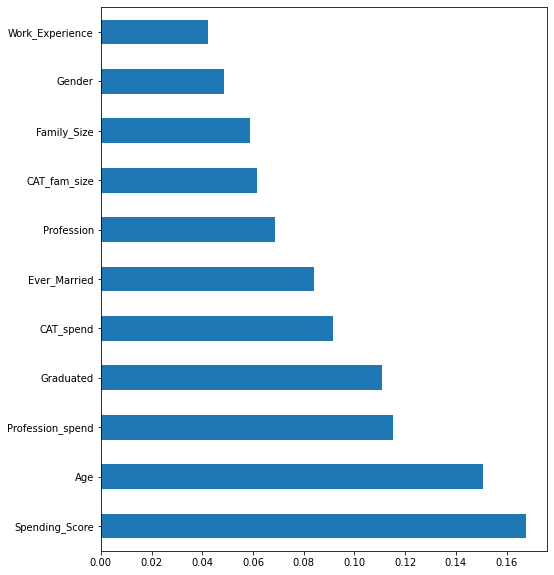

In [474]:
feat_imp = pd.Series(model.feature_importances_, index=df_new_train.drop(['Var_1',"Segmentation"], axis=1).columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))


In [475]:
model = XGBClassifier(random_state=11, verbose=500, max_depth = 3, subsample = 0.5)
#model = CatBoostClassifier(random_state=27,  n_estimators=20, max_depth=4)
model.fit(X_train, Y)
preds = (model.predict(X_test))

In [476]:
map_id = {}
for i in range(len(test_id)):
  map_id[test_id[i]] = preds[i]

df_submit = pd.DataFrame({'ID': original_test_id, 'Segmentation': original_test_id})
df_submit.Segmentation = df_submit.Segmentation.map(map_id)
df_submit.to_csv('base.csv', index=False)

Post processing( replacing common test ids with train id labels)

In [478]:
id = df_train['ID'].values
val = df_train['Segmentation'].values
age = df_test['Age'].values
prof = df_test['Profession'].values
var_1 = df_test['Var_1'].values
count = 0
map = {}
for i in range(len(id)):
  map[id[i]] = val[i]

test_id = df_test['ID'].values
res = []

for i in range(len(test_id)):
  if (age[i]<25 and prof[i]=='Healthcare') or (prof[i]==-1 and age[i]<=25):
    res.append('D')
  elif test_id[i] in map:
    res.append(map[test_id[i]])
  elif (var_1[i]=='Cat_2' and (age[i]==19 or age[i]==23) ) or (var_1[i]=='Cat_3' and (age[i]==21)) or (var_1[i]=='Cat_4' and (age[i]==18 or age[i]==20)):
    res.append('D')
  else:
    #print(test_id[i])
    res.append(map_id[test_id[i]])
    count += 1

df_submit = pd.DataFrame({'ID': original_test_id})
df_submit['Segmentation'] = res
df_submit.to_csv('base.csv', index=False)
